# Plotting with VegaLite

## Setup

To render graphs in Livebook, we need the
[`vega_lite`](https://github.com/elixir-nx/vega_lite) package
for defining our graph specification

In [1]:
Mix.install([
  {:vega_lite, "~> 0.1.0"}
])

Generated vega_lite app

==> vega_lite
Compiling 5 files (.ex)

Resolving Hex dependencies...
Dependency resolution completed:
New:
  vega_lite 0.1.1
* Getting vega_lite (Hex package)


:ok

`IElixir` knows how to render **VegaLite** plots by itself - you don't need to use any side libraries for it! The only thing you need - is to get it's schema representation using `VegaLite.to_spec/1` function.

Alternative way - is to define `IElixir.Display` protocol for `VegaLite` structure, that will call this function automatically for us. We will do it in the beginning of this notebook:

In [2]:
defimpl IElixir.Displayable, for: VegaLite do
  def display(vl), do: VegaLite.to_spec(vl)
end

{:module, IElixir.Displayable.VegaLite,
 <<70, 79, 82, 49, 0, 0, 7, 76, 66, 69, 65, 77, 65, 116, 85, 56, 0, 0, 0, 242, 0, 0, 0, 21, 35, 69,
   108, 105, 120, 105, 114, 46, 73, 69, 108, 105, 120, 105, 114, 46, 68, 105, 115, 112, 108, 97,
   121, ...>>, {:__impl__, 1}}

When building graphics we make extensive use of the functions from `VegaLite`,
so it's useful to alias the module as something shorter.

In [3]:
alias VegaLite, as: Vl

VegaLite

## Basic concepts

Composing a basic Vega-Lite graphic usually consists of the following steps:

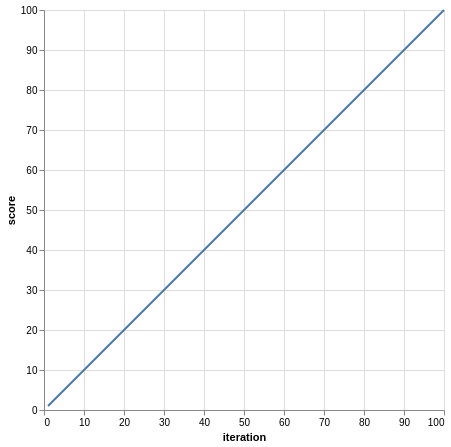

In [4]:
# Initialize the specification, optionally with some top-level properties
Vl.new(width: 400, height: 400)
# Specify data source for the graphic using one of the data_from_* functions
|> Vl.data_from_series(iteration: 1..100, score: 1..100)
# Pick a visual mark
|> Vl.mark(:line)
# Map data fields to visual properties of the mark, in this case point positions
|> Vl.encode_field(:x, "iteration", type: :quantitative)
|> Vl.encode_field(:y, "score", type: :quantitative)

Below you can find a number of example graphics for common use cases.
For a number of plain Vega-Lite examples you can look
[here](https://vega.github.io/vega-lite/examples).

## Bar charts

### Simple bar chart

A bar chart encodes quantitative values as the length of regular bars.

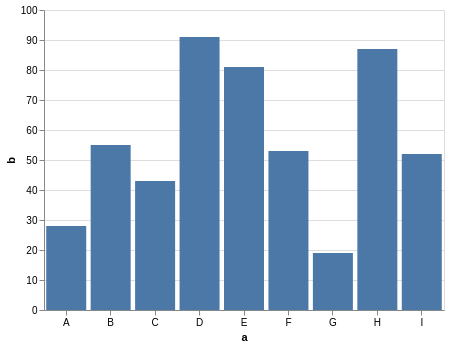

In [5]:
# Source: https://vega.github.io/vega-lite/examples/bar.html

data = [
  %{"a" => "A", "b" => 28},
  %{"a" => "B", "b" => 55},
  %{"a" => "C", "b" => 43},
  %{"a" => "D", "b" => 91},
  %{"a" => "E", "b" => 81},
  %{"a" => "F", "b" => 53},
  %{"a" => "G", "b" => 19},
  %{"a" => "H", "b" => 87},
  %{"a" => "I", "b" => 52}
]

Vl.new(width: 400, height: 300)
|> Vl.data_from_values(data)
|> Vl.mark(:bar)
|> Vl.encode_field(:x, "a", type: :nominal, axis: [label_angle: 0])
|> Vl.encode_field(:y, "b", type: :quantitative)

### Stacked bar chart

A stacked bar chart contains multi-color bars to represent
several quantitive values at once.

In [ ]:
# Source: https://vega.github.io/vega-lite/examples/stacked_bar_weather.html

Vl.new(width: 300, height: 200)
|> Vl.data_from_url("https://vega.github.io/editor/data/seattle-weather.csv")
|> Vl.mark(:bar)
|> Vl.encode_field(:x, "date", time_unit: :month, type: :ordinal, title: "Month of the year")
|> Vl.encode(:y, aggregate: :count, type: :quantitative, title: "Number of days")
|> Vl.encode_field(:color, "weather",
  type: :nominal,
  title: "Weather type",
  scale: [
    domain: ["sun", "fog", "drizzle", "rain", "snow"],
    range: ["#e7ba52", "#c7c7c7", "#aec7e8", "#1f77b4", "#9467bd"]
  ]
)

### Grouped bar chart

Graphing one bar plot per group.

In [ ]:
# Source: https://vega.github.io/vega-lite/examples/bar_grouped.html

Vl.new(width: [step: 12])
|> Vl.data_from_url("https://vega.github.io/editor/data/population.json")
|> Vl.transform(filter: "datum.year == 2000")
|> Vl.transform(calculate: "datum.sex == 2 ? 'Female' : 'Male'", as: "gender")
|> Vl.mark(:bar)
|> Vl.encode_field(:column, "age", type: :ordinal, spacing: 10)
|> Vl.encode_field(:y, "people", aggregate: :sum, title: "population", axis: [grid: false])
|> Vl.encode_field(:x, "gender", title: nil)
|> Vl.encode_field(:color, "gender")
|> Vl.config(view: [stroke: nil])

## Histograms, density plots and dot plots

### Histogram

A histogram represents the value frequency in predefined intervals.

In [ ]:
# Source: https://vega.github.io/vega-lite/examples/histogram.html

Vl.new()
|> Vl.data_from_url("https://vega.github.io/editor/data/movies.json")
|> Vl.mark(:bar)
|> Vl.encode_field(:x, "IMDB Rating", bin: true)
|> Vl.encode(:y, aggregate: :count)

### Density plot

A density plot represents the distribution estimate of a numeric value.

In [ ]:
# Source: https://vega.github.io/vega-lite/examples/area_density.html

Vl.new(width: 400, height: 100)
|> Vl.data_from_url("https://vega.github.io/editor/data/movies.json")
|> Vl.transform(density: "IMDB Rating")
|> Vl.mark(:area)
|> Vl.encode_field(:x, "value", type: :quantitative, title: "IMDB rating")
|> Vl.encode_field(:y, "density", type: :quantitative)

### Stacked density estimates

Several density plots stacked together.

In [ ]:
# Source: https://vega.github.io/vega-lite/examples/area_density_stacked.html

Vl.new(width: 400, height: 80)
|> Vl.data_from_url("https://vega.github.io/editor/data/penguins.json")
|> Vl.transform(density: "Body Mass (g)", groupby: ["Species"], extent: [2500, 6500])
|> Vl.mark(:area)
|> Vl.encode_field(:x, "value", type: :quantitative, title: "Body mass (g)")
|> Vl.encode_field(:y, "density", type: :quantitative, stack: true)
|> Vl.encode_field(:color, "Species", type: :nominal)

### 2D Histogram scatterplot

A 2D version of a regular histogram, with intervals in both axis
and frequency represented by point size.

In [ ]:
# Source: https://vega.github.io/vega-lite/examples/circle_binned.html

Vl.new()
|> Vl.data_from_url("https://vega.github.io/editor/data/movies.json")
|> Vl.mark(:circle)
|> Vl.encode_field(:x, "IMDB Rating", bin: [maxbins: 10])
|> Vl.encode_field(:y, "Rotten Tomatoes Rating", bin: [maxbins: 10])
|> Vl.encode(:size, aggregate: :count)

### 2D Histogram heatmap

Another version of 2D histogram, with color scale representing value frequency.

In [ ]:
# Source: https://vega.github.io/vega-lite/examples/rect_binned_heatmap.html

Vl.new(width: 300, height: 200)
|> Vl.data_from_url("https://vega.github.io/editor/data/movies.json")
|> Vl.transform(
  filter: [
    and: [
      [field: "IMDB Rating", valid: true],
      [field: "Rotten Tomatoes Rating", valid: true]
    ]
  ]
)
|> Vl.mark(:rect)
|> Vl.encode_field(:x, "IMDB Rating", bin: [maxbins: 60])
|> Vl.encode_field(:y, "Rotten Tomatoes Rating", bin: [maxbins: 40])
|> Vl.encode(:color, aggregate: :count)
|> Vl.config(view: [stroke: nil])

### 2D Ordinal heatmap

A heatmap similar to the above, but with already discrete categories.

In [ ]:
# Source: https://vega.github.io/vega-lite/examples/rect_heatmap_weather.html

Vl.new(title: "Daily max temperatures (C) in Seattle, WA")
|> Vl.data_from_url("https://vega.github.io/editor/data/seattle-weather.csv")
|> Vl.mark(:rect)
|> Vl.encode_field(:x, "date",
  time_unit: :date,
  type: :ordinal,
  title: "Day",
  axis: [label_angle: 0, format: "%e"]
)
|> Vl.encode_field(:y, "date",
  time_unit: :month,
  type: :ordinal,
  title: "Month"
)
|> Vl.encode_field(:color, "temp_max",
  aggregate: :max,
  type: :quantitative,
  legend: [title: nil]
)
|> Vl.config(view: [stroke: nil])

## Scatter and strip plots - TBD